<a href="https://colab.research.google.com/github/shadab4150/SneakerNet/blob/master/SneakerNet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.vision import *
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

In [0]:
path=Path('/content/drive/My Drive/sneakers')

In [5]:
path.ls()

[PosixPath('/content/drive/My Drive/sneakers/Nike sneakers'),
 PosixPath('/content/drive/My Drive/sneakers/Puma sneakers'),
 PosixPath('/content/drive/My Drive/sneakers/Adidas sneakers')]

In [0]:
classes = ['adidas','nike','puma']

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['Adidas sneakers', 'Nike sneakers', 'Puma sneakers']

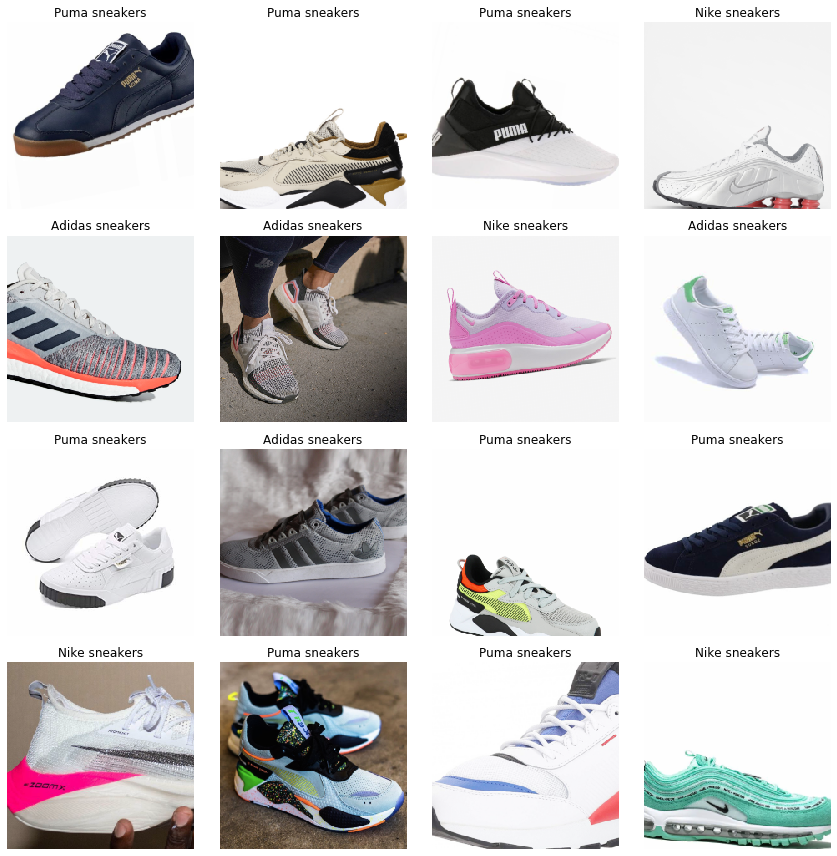

In [9]:
data.show_batch(rows=4, figsize=(12,12))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Adidas sneakers', 'Nike sneakers', 'Puma sneakers'], 3, 369, 92)

In [23]:
learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 47.3MB/s]


In [24]:
learn50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.754957,1.165346,0.456522,00:17
1,1.454114,1.916350,0.467391,00:17
2,1.272576,1.736017,0.391304,00:16
3,1.090354,1.547698,0.369565,00:16


In [25]:
learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-06
Min loss divided by 10: 2.29E-03


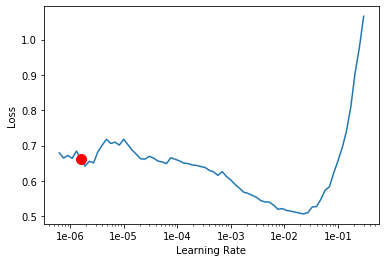

In [26]:
learn50.recorder.plot(suggestion=True)

In [27]:
learn50.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.807317,1.344747,0.336957,00:17
1,0.759839,1.752920,0.358696,00:17
2,0.641160,1.691547,0.347826,00:16
3,0.579347,1.540201,0.347826,00:16


In [28]:
learn50.fit_one_cycle(8, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.408014,1.397694,0.336957,00:16
1,0.311674,1.352229,0.358696,00:16
2,0.265962,1.509887,0.315217,00:16
3,0.257517,1.540277,0.358696,00:16
4,0.253553,1.445802,0.304348,00:17
5,0.219408,1.474176,0.347826,00:16
6,0.201598,1.507674,0.326087,00:15
7,0.191695,1.488176,0.326087,00:16


In [0]:
learn50.save('stage-50-1')

In [0]:
learn50.unfreeze()

In [32]:
learn50.fit_one_cycle(12, max_lr=slice(1e-03,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.242123,2.834430,0.478261,00:16
1,0.823848,78.954079,0.663043,00:16
2,0.975943,39648.367188,0.663043,00:15
3,1.022653,6992.519531,0.663043,00:16
4,1.013688,425.130280,0.663043,00:16
5,0.980179,4.056408,0.489130,00:16
6,0.928201,1.506499,0.347826,00:16
7,0.871969,0.743024,0.293478,00:16
8,0.807158,0.796578,0.293478,00:16
9,0.744874,0.697041,0.250000,00:16


In [0]:
learn50.unfreeze()

In [37]:
learn50.fit_one_cycle(16, max_lr=slice(1e-03,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.300786,0.849568,0.282609,00:16
1,0.252864,0.859108,0.250000,00:15
2,0.260314,3.867159,0.369565,00:16
3,0.365215,6.727419,0.652174,00:16
4,0.382350,231.435867,0.652174,00:17
5,0.447386,27.625191,0.500000,00:16
6,0.477858,92.797310,0.619565,00:16
7,0.492133,67.228226,0.652174,00:16
8,0.506328,52.464165,0.489130,00:16
9,0.488006,3.996714,0.380435,00:16


In [0]:
learn50.save('stage-50-1-231')

In [0]:
learn50.unfreeze()

In [40]:
interp1 = ClassificationInterpretation.from_learner(learn50)

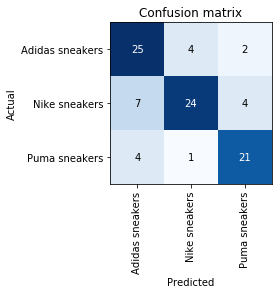

In [41]:
interp1.plot_confusion_matrix()

In [42]:
#interp = ClassificationInterpretation.from_learner(learn)

losses1,idxs1 = interp1.top_losses()

len(data.valid_ds)==len(losses1)==len(idxs1)

True

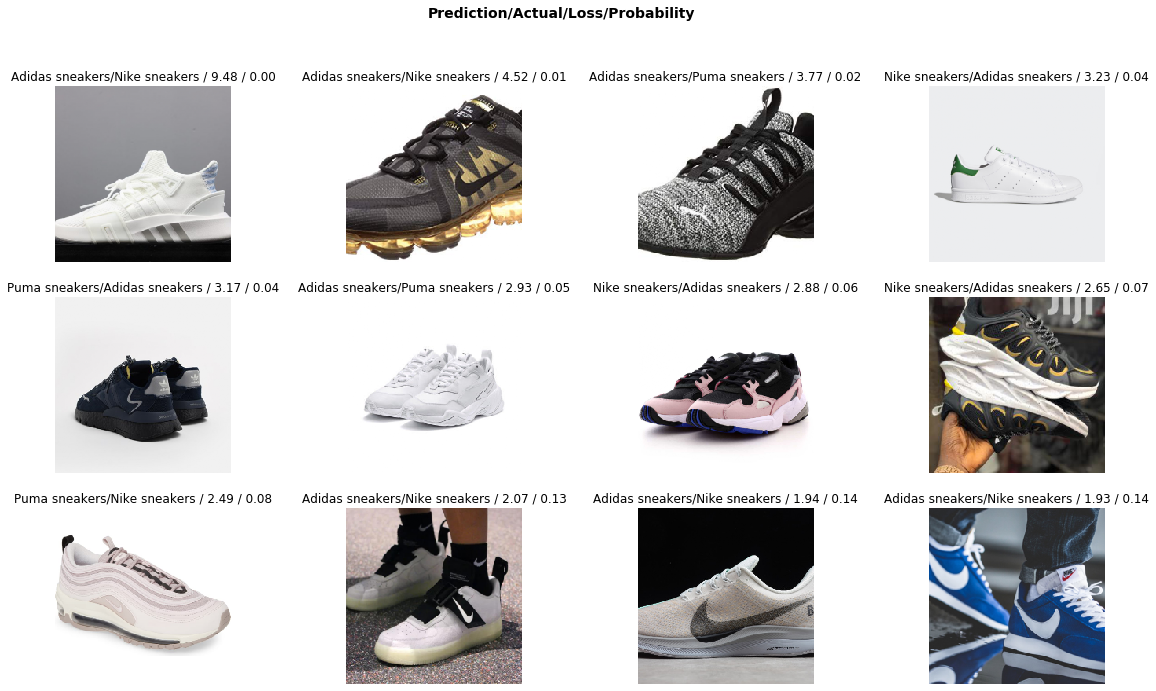

In [43]:
interp1.plot_top_losses(9, figsize=(20,11))

In [0]:
learn50.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn50new = load_learner(path)

prediction : Nike sneakers


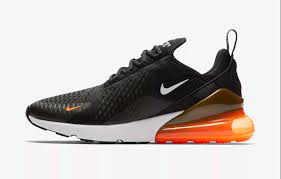

In [48]:
imgK=open_image('/content/download (3).jpg')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
#print('actual: '+str(i[9:-4]))
print("prediction : "+str(pred_class))
imgK

prediction : Adidas sneakers


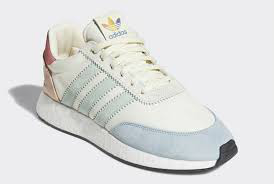

In [49]:
imgK=open_image('/content/images (5).jpg')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
#print('actual: '+str(i[9:-4]))
print("prediction : "+str(pred_class))
imgK

prediction : Adidas sneakers


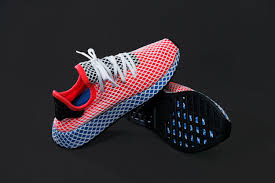

In [52]:
imgK=open_image('/content/images (4).jpg')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
#print('actual: '+str(i[9:-4]))
print("prediction : "+str(pred_class))
imgK

prediction : Nike sneakers


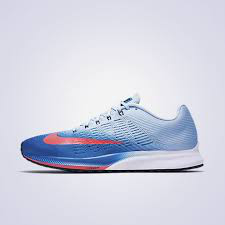

In [54]:
imgK=open_image('/content/images (1).jpg')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
#print('actual: '+str(i[9:-4]))
print("prediction : "+str(pred_class))
imgK

prediction : Adidas sneakers


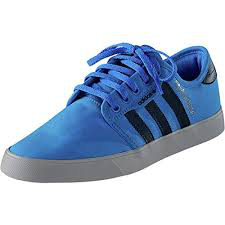

In [55]:
imgK=open_image('/content/download (4).jpg')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
#print('actual: '+str(i[9:-4]))
print("prediction : "+str(pred_class))
imgK

prediction : Adidas sneakers


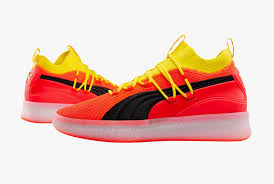

In [57]:
imgK=open_image('/content/images (3).jpg')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
#print('actual: '+str(i[9:-4]))
print("prediction : "+str(pred_class))
imgK

prediction : Adidas sneakers


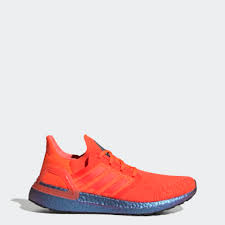

In [59]:
imgK=open_image('/content/images (6).jpg')
pred_class,pred_idx,outputs = learn50new.predict(imgK)
#print('actual: '+str(i[9:-4]))
print("prediction : "+str(pred_class))
imgK

# Currently model has an accuracy of 76%.

In [0]:
https://drive.google.com/uc?export=download&id=1-SpC5SovwztKQ82xD0BrPyUeXroYasjD

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 38.5MB/s]


In [12]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.769382,1.443611,0.586957,01:48
1,1.563847,1.507856,0.478261,00:20
2,1.401638,1.645527,0.445652,00:17
3,1.270241,1.380823,0.402174,00:15
4,1.118218,1.278240,0.391304,00:16
5,1.008080,1.296616,0.369565,00:15
6,0.948126,1.306927,0.358696,00:15
7,0.890580,1.294016,0.369565,00:15


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-04
Min loss divided by 10: 1.45E-04


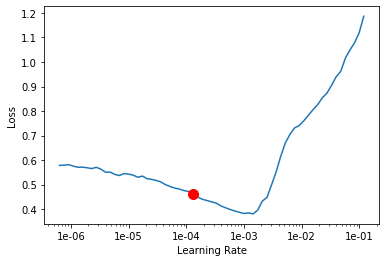

In [16]:
learn.recorder.plot(suggestion=True)

In [17]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.479728,1.455652,0.380435,00:15
1,0.546467,1.611985,0.369565,00:16
2,0.530503,1.531707,0.369565,00:16
3,0.466484,1.429660,0.358696,00:17


In [18]:
interp = ClassificationInterpretation.from_learner(learn)

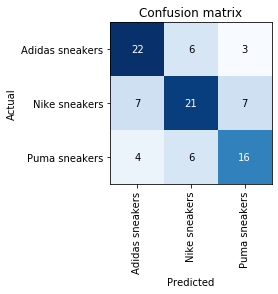

In [19]:
interp.plot_confusion_matrix()

In [20]:
#interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

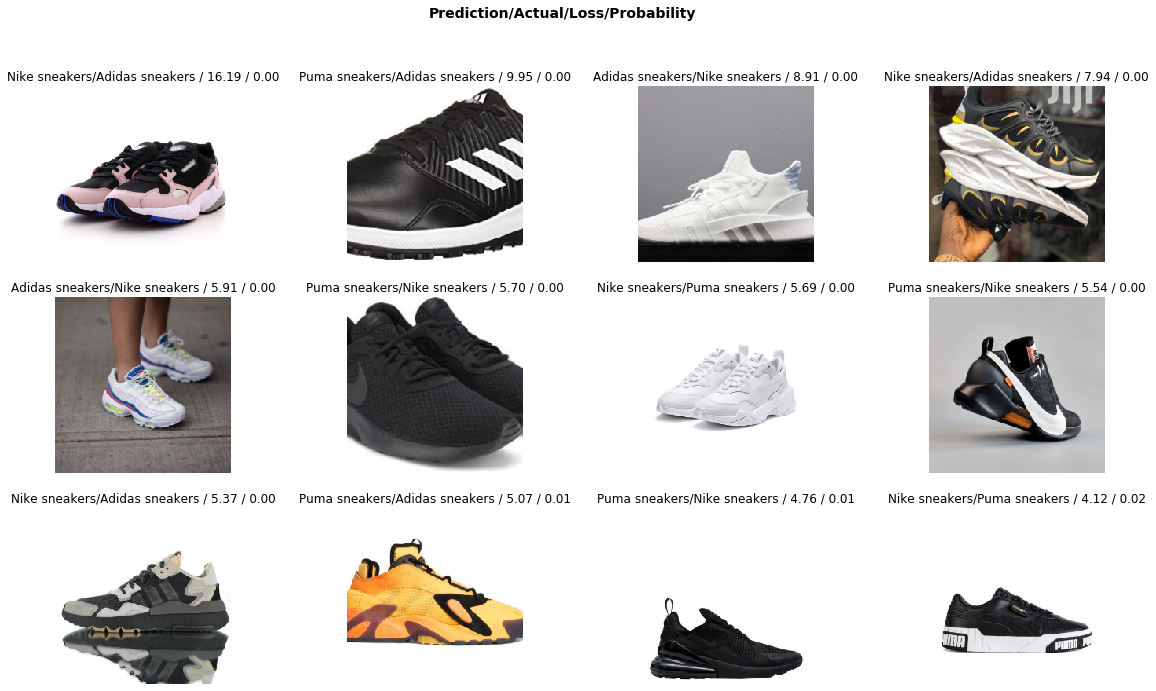

In [21]:
interp.plot_top_losses(12, figsize=(20,11))

In [22]:
interp.most_confused(min_val=2)

[('Nike sneakers', 'Adidas sneakers', 7),
 ('Nike sneakers', 'Puma sneakers', 7),
 ('Adidas sneakers', 'Nike sneakers', 6),
 ('Puma sneakers', 'Nike sneakers', 6),
 ('Puma sneakers', 'Adidas sneakers', 4),
 ('Adidas sneakers', 'Puma sneakers', 3)]

In [58]:
learn.fit_one_cycle(16, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.279928,1.395855,0.336957,00:16
1,0.294933,1.354234,0.336957,00:16
2,0.279253,1.297663,0.315217,00:15
3,0.260764,1.252851,0.304348,00:15
4,0.250400,1.238411,0.304348,00:15
5,0.220929,1.230389,0.336957,00:15
6,0.205207,1.207006,0.326087,00:15
7,0.181177,1.226306,0.315217,00:15
8,0.163145,1.188456,0.326087,00:15
9,0.154875,1.156278,0.304348,00:15
